In [41]:
#Package imports needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels as sm
import seaborn as sns
from scipy import stats
import scipy

## Loading the Data as DataFrame

In [14]:
#Load data as data frame, get some bsic sense of the data
df = pd.read_csv('data/EPL_Soccer_MLR_LR.csv')

## Exploring the data

In [15]:
#Checking for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [16]:
#Checking for the minimum, 25th, 50th, 75th, and max for different variables
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [18]:
#Checking for Correlation
df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


In [31]:
#Strongest Predictor for the Score: 
check_corr = df.corr()['Score']
check_corr[(check_corr > abs(0.5)) & (check_corr < 1)]

Cost    0.963017
Name: Score, dtype: float64

## Plotting Cost vs Score

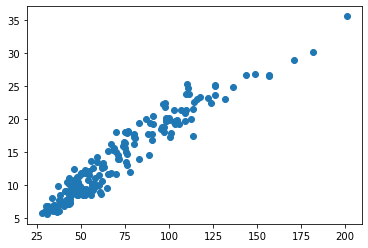

In [32]:
plt.scatter(df['Cost'], df['Score'])

#### Strong Linear Association between cost and score. Outliers above Cost of 125?

## Assigning X and Y

In [33]:
x = df['Cost']
y = df['Score']

## Splitting with 75% Training, 25% Testing Data

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 100)

## StatsModel Approach to Regression

In [42]:
lr = sm.regression.linear_model.OLS(y_train, x_train).fit()

#Printing the paramaters
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                   3.84e-144
Time:                        18:08:14   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Force intercept term

In [43]:
x_train_with_intercept = sm.tools.tools.add_constant(x_train)
lr = sm.regression.linear_model.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           6.91e-88
Time:                        18:08:30   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##  Extract the B0 and B1

const    0.947185
Cost     0.182083
dtype: float64


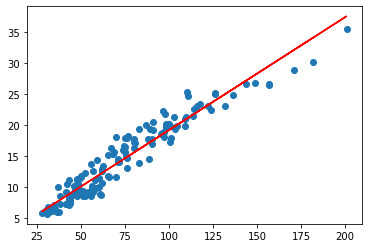

In [45]:
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1*x_train, 'r')
plt.show()

## Plot the fitted line on test data

In [48]:
x_test_with_intercept = sm.tools.tools.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)

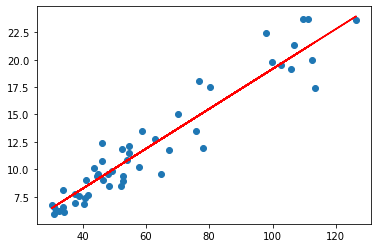

In [49]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

## Diagnostics


Checklist:
- Non-linearity
- Non-Constant Variance
- Deviations From Normality
- Errors not IID
- Outliers
- Missing Predictors

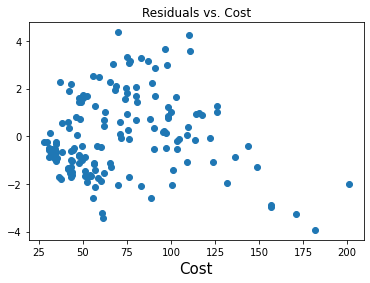

In [50]:
## Build Predictions on Training Data
predictions_y = lr.predict(x_train_with_intercept)

#Find Residuals
r_i = (y_train - predictions_y)

#Residuals vs. predictor in training data
plt.title('Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_train, r_i)
plt.show()

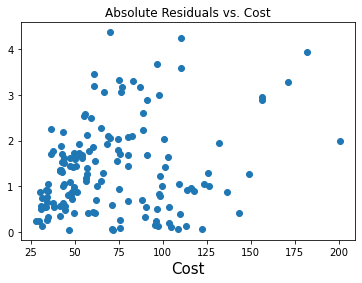

In [51]:
#Absolute Residuals Against Predictor
abs_r_i = np.abs(y_train - predictions_y)
plt.title('Absolute Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_train, abs_r_i)
plt.show()

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

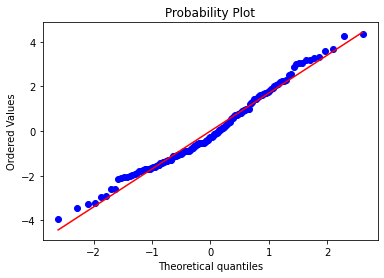

In [52]:
#Normality plot
scipy.stats.probplot(r_i, plot = plt)

#### Tails might be a little heavy, but overall no clear reason to reject normality expectations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


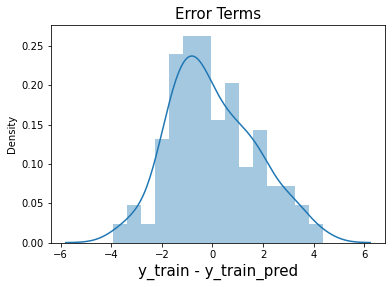

In [54]:
#Evaluate normality through histogram of residuals
#Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Residual Boxplot')

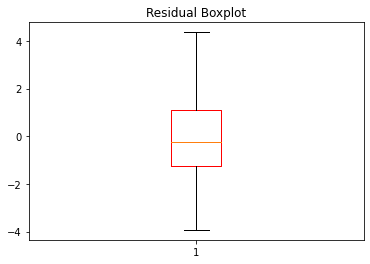

In [55]:
#Boxplot for outliers
#plot
plt.boxplot(r_i, boxprops = dict(color = 'red'))
plt.title('Residual Boxplot')

In [57]:
## Demo of how to deal with non-constant variance through transformations
test_residuals = (y_test -  y_test_fitted)
print("Length of Y Test: ", len(y_test))
print("Length of Y Test Fitted: ", len(y_test_fitted))
print("Length of Test Residuals: ", len(test_residuals))

Length of Y Test:  51
Length of Y Test Fitted:  51
Length of Test Residuals:  51


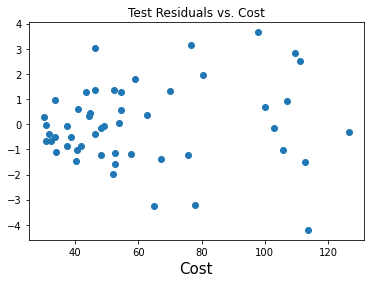

In [58]:
# Residuals vs. Predictor in test set
plt.title('Test Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_test, test_residuals)
plt.show()

#### Some evidence of non-constant variance 

### Trying other transformations

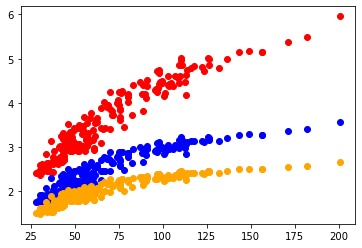

In [62]:
#Sqrt Transformation
sqrt_y = np.sqrt(y)
plt.scatter(x, sqrt_y, color = 'red')

#LN Transformation
ln_y = np.log(y)
plt.scatter(x, ln_y, color = 'blue')

#Box Cox Transformation
bc_y = list(stats.boxcox(y))
bc_y = bc_y[0]
plt.scatter(x, bc_y, color = 'orange')

#### Choose Square Root Transformation

In [63]:
## Runing Regression using Sqrt Transformation
x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75, 
                                                   test_size = 0.25, random_state = 100)

#Forece intercept Term
x_train_with_intercept = sm.tools.tools.add_constant(x_train)
lr = sm.regression.linear_model.OLS(y_train, x_train_with_intercept).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 23 Feb 2022   Prob (F-statistic):           9.72e-75
Time:                        19:54:14   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

const    1.967367
Cost     0.023433
dtype: float64


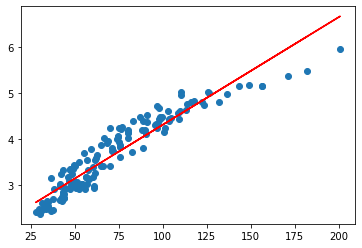

In [64]:
#Extract the B0, B1
print(lr.params)
b0 = lr.params[0]
b1 = lr.params[1]

#Plot the fitted line on training data
plt.scatter(x_train,y_train)
plt.plot(x_train, b0 + b1*x_train, 'r')
plt.show()

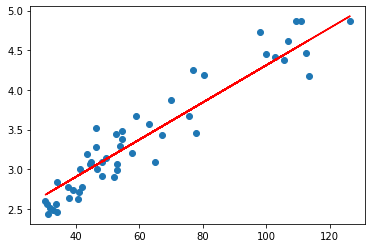

In [65]:
# Plot the fitted line on test data
x_test_with_intercept = sm.tools.tools.add_constant(x_test)
y_test_fitted = lr.predict(x_test_with_intercept)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

In [66]:
# Evaluate Variance
#Diagnostics
test_residuals = (y_test - y_test_fitted)
print("Length of Y Test: ", len(y_test))
print("Length of Y Test Fitted: ", len(y_test_fitted))
print("Length of Test Residuals: ", len(test_residuals))

Length of Y Test:  51
Length of Y Test Fitted:  51
Length of Test Residuals:  51


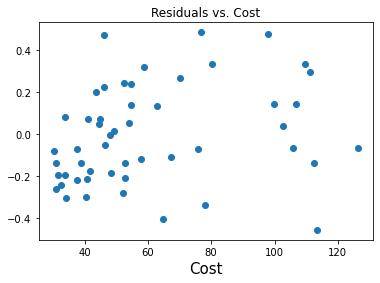

In [67]:
#Residuals vs Predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost', fontsize = 15)
plt.scatter(x_test, test_residuals)
plt.show()

### Non-Constant Variance Reduced and Coefficient of Determination